In [1]:
#ELE492 Homework 1
#Author: Anıl Karaca
#School ID: 21728405

In [2]:
#Importing relevant modules
from skimage import io
from skimage.color import rgb2gray

In [3]:
#Viewving the Grand Hotel Folkestone photo
img = io.imread("img1.jpg")
io.imshow(img)

In [4]:
#Getting the image resolution
img.shape

(514, 640, 3)

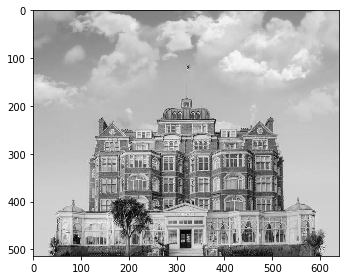

In [5]:
#Converting the RGB image into a grayscale image
img_gray=rgb2gray(img)
io.imshow(img_gray)

In [6]:
#Getting the image resolution
img_gray.shape

(514, 640)

In [7]:
type(img_gray)
#Since our img is actually a numpy array
#we should be able to access a pixel value
#just like we would access an element in an array

numpy.ndarray

In [8]:
#Printing the pixel values
print(img_gray)
#All of our pixels have a value between 0.00 and 1.00(grayscale

[[0.68586667 0.68586667 0.6819451  ... 0.80516549 0.80516549 0.80516549]
 [0.68978824 0.68978824 0.68586667 ... 0.78555765 0.78163608 0.78163608]
 [0.6937098  0.6937098  0.68978824 ... 0.76987137 0.76987137 0.76987137]
 ...
 [0.82420784 0.82420784 0.82420784 ... 0.82420784 0.82420784 0.82420784]
 [0.82420784 0.82420784 0.82420784 ... 0.82812941 0.82812941 0.82812941]
 [0.82420784 0.82420784 0.82420784 ... 0.82812941 0.82812941 0.82812941]]


In [9]:
#For negative image
#I'm going to use the formula we have covered on Lecture8 pdf
#s=L-1-r
#r:Old pixel value
#s:New pixel value
#L-1:intensity range([0,255] for RGB, [0,1] for grayscale)
#Since we are working with a grayscale image L-1 must be 1
#The formula becomes
#s=1-r

In [10]:
#Getting image negative
def negative(img):
    return 1 - img #Making use of the broadcasting feature of Python

img_gray_negative = negative(img_gray)

In [11]:
#Printing the pixel values
print(img_gray_negative)

[[0.31413333 0.31413333 0.3180549  ... 0.19483451 0.19483451 0.19483451]
 [0.31021176 0.31021176 0.31413333 ... 0.21444235 0.21836392 0.21836392]
 [0.3062902  0.3062902  0.31021176 ... 0.23012863 0.23012863 0.23012863]
 ...
 [0.17579216 0.17579216 0.17579216 ... 0.17579216 0.17579216 0.17579216]
 [0.17579216 0.17579216 0.17579216 ... 0.17187059 0.17187059 0.17187059]
 [0.17579216 0.17579216 0.17579216 ... 0.17187059 0.17187059 0.17187059]]


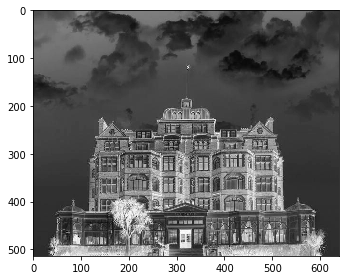

In [12]:
#Now let's have a look at the negative of the grayscale image
io.imshow(img_gray_negative)

In [13]:
#For gamma correction
#I'm going to use the formula we have covered on Lecture8 pdf
#s=c*(r**g)
#r:Old pixel value
#s:New pixel value
#g:Gamma value
#c:Constant which I'll set as 1 for this homework
#The formula becomes
#s=(r**g)

In [14]:
#Applying gamma correction
def gamma(c, g, img):
    return img**g #Making use of the broadcasting feature of Python

img_gray_gamma = gamma(1, 0.6, img_gray) #Gamma correction with g=0.6

In [15]:
#Printing the pixel values
print(img_gray_gamma)

[[0.7975241  0.7975241  0.79478497 ... 0.87807395 0.87807395 0.87807395]
 [0.80025698 0.80025698 0.7975241  ... 0.86518073 0.8625867  0.8625867 ]
 [0.80298364 0.80298364 0.80025698 ... 0.85477321 0.85477321 0.85477321]
 ...
 [0.89047564 0.89047564 0.89047564 ... 0.89047564 0.89047564 0.89047564]
 [0.89047564 0.89047564 0.89047564 ... 0.89301535 0.89301535 0.89301535]
 [0.89047564 0.89047564 0.89047564 ... 0.89301535 0.89301535 0.89301535]]


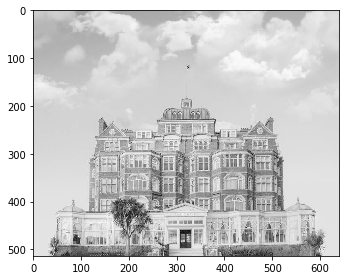

In [16]:
#Now let's have a look at the gamma corrected grayscale image
io.imshow(img_gray_gamma)

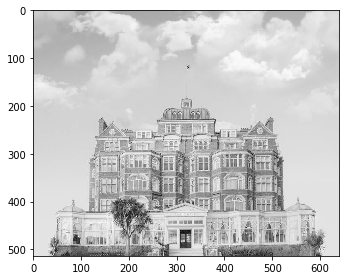

In [17]:
#Now let's tryout skimage's built-in gamma correction
from skimage import exposure

img_gray_gamma2 = exposure.adjust_gamma(img_gray, 0.6)
io.imshow(img_gray_gamma2)
#As you can see we got the same image with the built-in function as well

In [18]:
#For log transformation
#I'm going to use the formula we have covered on Lecture8 pdf
#s=c*log(1+r)
#r:Old pixel value
#s:New pixel value
#c:Parameter

In [19]:
#Applying log transformation
from numpy import log

def log_transform(c, img):
    return c*(log(1+img)) #Making use of the broadcasting feature of Numpy

img_gray_log = log_transform(1, img_gray)

In [20]:
#Printing the pixel values
print(img_gray_log)

[[0.52227977 0.52227977 0.51995092 ... 0.59065227 0.59065227 0.59065227]
 [0.52460322 0.52460322 0.52227977 ... 0.57973077 0.57753209 0.57753209]
 [0.52692127 0.52692127 0.52460322 ... 0.57090687 0.57090687 0.57090687]
 ...
 [0.60114583 0.60114583 0.60114583 ... 0.60114583 0.60114583 0.60114583]
 [0.60114583 0.60114583 0.60114583 ... 0.60329326 0.60329326 0.60329326]
 [0.60114583 0.60114583 0.60114583 ... 0.60329326 0.60329326 0.60329326]]


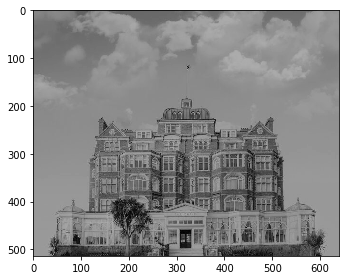

In [21]:
#Now let's have a look at the gamma corrected grayscale image
io.imshow(img_gray_log)

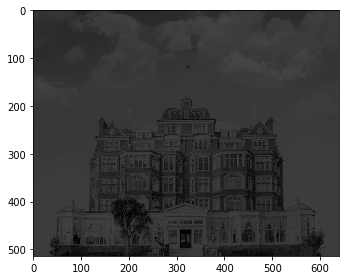

In [22]:
img_gray_log2 = log_transform(0.4, img_gray)
io.imshow(img_gray_log2)
#As the parameter "c" gets smaller the image becames darker

In [23]:
#Importing relevant functions for downscaling and upscaling
from skimage.transform import rescale, resize

In [24]:
#In order to downscale an image by a 2, we need to use a scale of 0.5
img_gray_down = rescale(img_gray, 0.5)

In [27]:
print("Shape of the image before downscaling:", img_gray.shape)
print("Shape of the image after downscaling:", img_gray_down.shape)

Shape of the image before downscaling: (514, 640)
Shape of the image after downscaling: (257, 320)


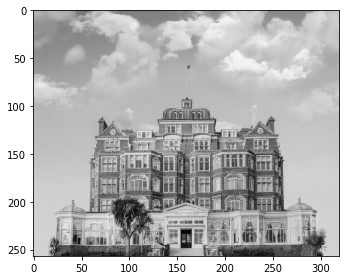

In [28]:
io.imshow(img_gray_down)

In [29]:
#In order to upscale an image by a 4, we need to use a scale of 4
img_gray_up = rescale(img_gray_down, 4)

In [30]:
print("Shape of the image before upscaling:", img_gray_down.shape)
print("Shape of the image after upscaling:", img_gray_up.shape)

Shape of the image before upscaling: (257, 320)
Shape of the image after upscaling: (1028, 1280)


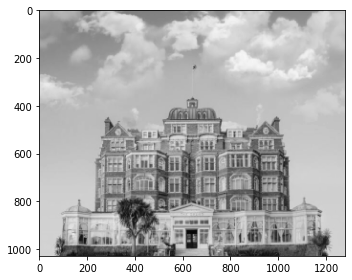

In [31]:
io.imshow(img_gray_up)
#As we can see from the resultant photo we have right below,
#upscaling process made the image even more blurry.
#This blurry effect takes place because "rescale" function implements
#some sort of interpolation techniques in order to fill out those
#empty pixels which are originally occured due to upscaling.

In [32]:
#I've taken 10 images with my cell phone camera of a painting I've done recently.
#I'm asked to display their average so,
#I'm going to import these images one by one,
#and then I'll sum up their pixel values.
#Finally I'll divide those values by 10 since we got total of 10 images

In [56]:
#Importing 10 images in to a list right after I turned them into gray scale
imgs=[rgb2gray(io.imread("./10images/10img1.jpg")),
     rgb2gray(io.imread("./10images/10img2.jpg")),
     rgb2gray(io.imread("./10images/10img3.jpg")),
     rgb2gray(io.imread("./10images/10img4.jpg")),
     rgb2gray(io.imread("./10images/10img5.jpg")),
     rgb2gray(io.imread("./10images/10img6.jpg")),
     rgb2gray(io.imread("./10images/10img7.jpg")),
     rgb2gray(io.imread("./10images/10img8.jpg")),
     rgb2gray(io.imread("./10images/10img9.jpg")),
     rgb2gray(io.imread("./10images/10img10.jpg")),]

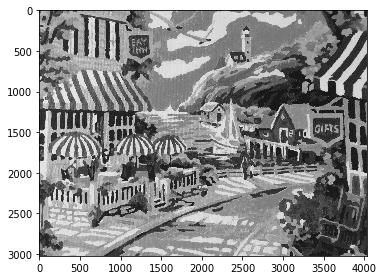

In [58]:
#Let's display one of them to get a sense of the image
io.imshow(imgs[0])

In [59]:
#Let's see one of those image's pixel values to get a mathematical sense
print(imgs[0])

[[0.35561333 0.33208392 0.2967898  ... 0.06662196 0.12152392 0.14505333]
 [0.32759686 0.31975373 0.30209529 ... 0.09015137 0.10975922 0.11368078]
 [0.31386    0.31778157 0.31386    ... 0.10583765 0.09407294 0.09799451]
 ...
 [0.25058627 0.25058627 0.21921373 ... 0.55666118 0.54881804 0.5292102 ]
 [0.24274314 0.23882157 0.21137059 ... 0.55471176 0.55666118 0.56058275]
 [0.22313529 0.22313529 0.19960588 ... 0.54294706 0.53902549 0.54294706]]


In [60]:
#As we can see above all the pixel values are just floating numbers between 0 and 1.
#So we can treat these images as arrays to get the job done.

In [62]:
#Adding all 10 image's pixel values
summed_imgs = sum(imgs)
print(summed_imgs)

[[5.2033451  5.29130118 5.35207412 ... 1.12563686 1.2589702  1.23376627]
 [5.11986824 5.17812627 5.2369498  ... 1.12171529 1.18446039 1.17494275]
 [5.05291098 5.09718706 5.13780941 ... 1.12171529 1.13404549 1.15198667]
 ...
 [1.97022902 2.10697882 2.21876275 ... 2.34699961 2.30831961 2.27133608]
 [1.90354745 2.02877765 2.22237882 ... 2.89596745 2.8934298  2.90040196]
 [1.94219765 1.99823843 2.20443765 ... 3.05502549 3.04547804 3.04576863]]


In [63]:
#Dividing these pixel values by 10 to get their average
avg_img = summed_imgs/10 #Making use of the broadcasting feature of Python
print(avg_img)

[[0.52033451 0.52913012 0.53520741 ... 0.11256369 0.12589702 0.12337663]
 [0.51198682 0.51781263 0.52369498 ... 0.11217153 0.11844604 0.11749427]
 [0.5052911  0.50971871 0.51378094 ... 0.11217153 0.11340455 0.11519867]
 ...
 [0.1970229  0.21069788 0.22187627 ... 0.23469996 0.23083196 0.22713361]
 [0.19035475 0.20287776 0.22223788 ... 0.28959675 0.28934298 0.2900402 ]
 [0.19421976 0.19982384 0.22044376 ... 0.30550255 0.3045478  0.30457686]]


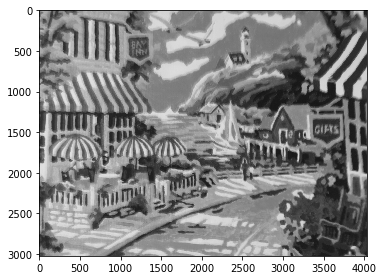

In [64]:
#Now let's see the image average of those 10 images
io.imshow(avg_img)